In [116]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import pybeh_pd as pb
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
#dataset from Loftus & Masson (1994) https://link.springer.com/article/10.3758/BF03210951
mat = np.array([[10, 13, 13],
          [6, 8, 8], 
          [11, 14, 14],
          [22, 23, 25], 
          [16, 18, 20], 
          [15, 17, 17], 
          [1, 1, 4],
          [12, 15, 17],
          [9, 12, 12],
          [8, 9, 12]])

# Table 1

In [118]:
mat_df = pd.DataFrame(mat)
mat_df.columns = ['cond_1', 'cond_2', 'cond_3']
df_table_1 = mat_df.reset_index().rename(columns={'index': 'sub'})
df_table_1['sub'] = df_table_1['sub'] + 1
df_table_1.set_index('sub')

,cond_1,cond_2,cond_3
sub,,,
1,10,13,13
2,6,8,8
3,11,14,14
4,22,23,25
5,16,18,20
6,15,17,17
7,1,1,4
8,12,15,17
9,9,12,12


In [119]:
df_table_1[['cond_1', 'cond_2', 'cond_3']].mean(axis=0) #table 1

cond_1    11.0
cond_2    13.0
cond_3    14.2
dtype: float64

In [120]:
#turn into long pandas dataframe so it's more like our traditional datasets
df_long = pd.melt(df_table_1, id_vars='sub', var_name='cond')
df_long

,sub,cond,value
0,1,cond_1,10
1,2,cond_1,6
2,3,cond_1,11
3,4,cond_1,22
4,5,cond_1,16
5,6,cond_1,15
6,7,cond_1,1
7,8,cond_1,12
8,9,cond_1,9
9,10,cond_1,8


In [121]:
n_subs = df_long['sub'].nunique()
n_conds = df_long['cond'].nunique()

# Table 2

In [122]:
M = df_long['value'].mean()
M_S = df_long.groupby(['sub'], as_index=False).agg({'value': 'mean'})
M_C = df_long.groupby(['cond'], as_index=False).agg({'value': 'mean'})
M #grand mean

12.733333333333333

In [123]:
#subject means
M_S

,sub,value
0,1,12.000000
1,2,7.333333
2,3,13.000000
3,4,23.333333
4,5,18.000000
5,6,16.333333
6,7,2.000000
7,8,14.666667
8,9,11.000000
9,10,9.666667


In [124]:
#condition means
M_C

,cond,value
0,cond_1,11.0
1,cond_2,13.0
2,cond_3,14.2


## Table 3

In [125]:
#Table 3
df_table_3 = df_long.copy()
df_table_3['M'] = df_long['value'].mean()
df_table_3['M_S'] = df_long.groupby(['sub'])['value'].transform('mean')
df_table_3['value'] = df_table_3['value'] - df_table_3['M_S'] + df_table_3['M']

In [126]:
df_table_3.pivot_table(values='value', index='sub', columns='cond')

cond,cond_1,cond_2,cond_3
sub,,,
1,10.733333,13.733333,13.733333
2,11.400000,13.400000,13.400000
3,10.733333,13.733333,13.733333
4,11.400000,12.400000,14.400000
5,10.733333,12.733333,14.733333
6,11.400000,13.400000,13.400000
7,11.733333,11.733333,14.733333
8,10.066667,13.066667,15.066667
9,10.733333,13.733333,13.733333


In [127]:
M = df_table_3['value'].mean()
M_S = df_table_3.groupby(['sub']).agg({'value': 'mean'})
M_C = df_table_3.groupby(['cond']).agg({'value': 'mean'})
M

12.73333333333333

In [128]:
M_S

,value
sub,
1,12.733333
2,12.733333
3,12.733333
4,12.733333
5,12.733333
6,12.733333
7,12.733333
8,12.733333
9,12.733333


In [129]:
M_C

,value
cond,
cond_1,11.0
cond_2,13.0
cond_3,14.2


# Full computation

In [187]:
df_a = df_long.copy()
df_a['M'] = df_a['value'].mean()
df_a['M_S'] = df_a.groupby(['sub'])['value'].transform('mean')
df_a['M_C'] = df_a.groupby(['cond'])['value'].transform('mean')
M_C = df_a.groupby(['cond']).agg({'value': 'mean'})['value'].values

#appendix A
# df_a['y_ij'] = ((df_a['value'] + df_a['M'] - df_a['M_S'])
df_a['S_W'] = ((df_a['value'] + df_a['M'] - df_a['M_S'] - df_a['M_C']) ** 2) 

SS_W = df_a['S_W'].sum() #Figure 3

# MS_SxC = df_a['S_W'].mean() #biased estimate
df = (n_subs - 1) * (n_conds - 1) #18, pg.482
MS_SxC = SS_W / df #same as using n - 1 in standard deviation computation

SE = np.sqrt(MS_SxC / n_subs)
tval = sp.stats.t.ppf(0.975, df)
CI = SE * tval # Eq. 2, pg. 482
CI

0.5209332748849111

### Equal Variances

<ErrorbarContainer object of 3 artists>

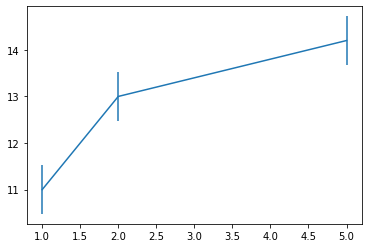

In [131]:
#Figure 5
plt.errorbar(x=[1, 2, 5], y=M_C, yerr=CI)

### Unequal Variances

In [274]:
df_MS = df_a.groupby(['cond', 'M_C'], as_index=False).agg({'S_W': 'sum'})
df_MS['MS_W'] = df_MS['S_W'] / (n_subs - 1)
df_MS['estimator'] = (n_conds / (n_conds - 1)) * (df_MS['MS_W'] - (MS_SxC / (n_conds)))
df_MS['CI'] = np.sqrt(df_MS['estimator'] / n_subs) * sp.stats.t.ppf(0.975, (n_subs-1))

<ErrorbarContainer object of 3 artists>

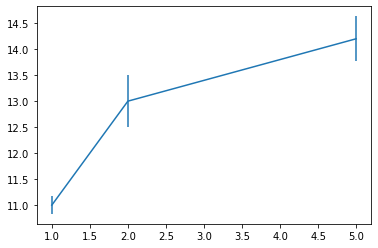

In [275]:
plt.errorbar(x=[1, 2, 5], y='M_C', yerr='CI', data=df_MS)

# Using analytic pybeh function

<ErrorbarContainer object of 3 artists>

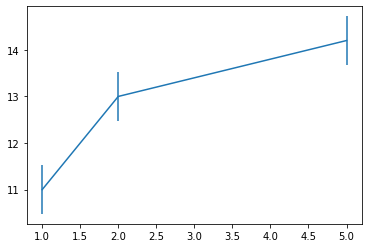

In [283]:
#function requires a column for "subject", "condition" and the "value" for each subject in each condition
df_loftus_masson = pb.loftus_masson_analytic(df_long, 'sub', 'cond', 'value')
plt.errorbar(x=[1, 2, 5], y='M_C', yerr='CI_equal', data=df_loftus_masson)

<ErrorbarContainer object of 3 artists>

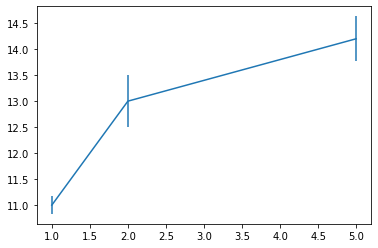

In [284]:
plt.errorbar(x=[1, 2, 5], y='M_C', yerr='CI_unequal', data=df_loftus_masson)

## FR1 SPC example

In [285]:
import cmlreaders as cml
import seaborn as sns

In [286]:
all_fr1_events = cml.CMLReader.load_events(experiments=["FR1"])

In [287]:
word_evs = all_fr1_events.query('type == "WORD"')

In [288]:
spc_sess_df = word_evs.groupby(['subject', 'session', 'serialpos'], as_index=False).agg({'recalled': 'mean'})
spc_df = spc_sess_df.groupby(['subject', 'serialpos'], as_index=False).agg({'recalled': 'mean'})

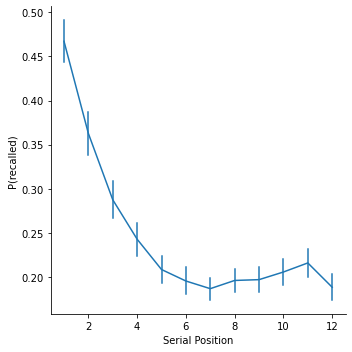

In [289]:
#between-subject errorbars
g = sns.relplot(x='serialpos', y='recalled', data=spc_df, kind='line', err_style="bars")
g.set(xlabel='Serial Position', ylabel='P(recalled)')

<ErrorbarContainer object of 3 artists>

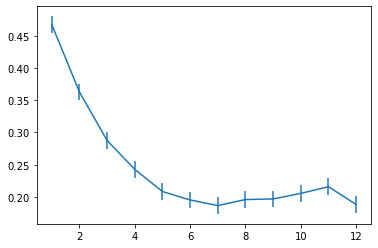

In [298]:
#within-subject errorbars -- notice they are smaller than above
spc_df_loftus_masson = pb.loftus_masson_analytic(spc_df, 'subject', 'serialpos', 'recalled')
plt.errorbar(x='serialpos', y='M_C', yerr='CI_equal', data=spc_df_loftus_masson)

<ErrorbarContainer object of 3 artists>

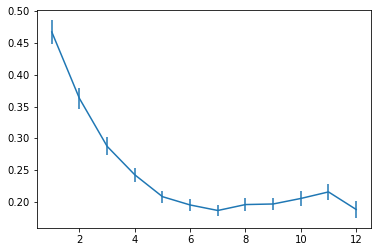

In [299]:
plt.errorbar(x='serialpos', y='M_C', yerr='CI_unequal', data=spc_df_loftus_masson)